# Etude des datasets

## Import des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import des datasets dans des dataframes

In [ ]:
Breast_Cancer = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')
Diabetes = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')
Heart_diseases = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/heartDisease.csv')
Kidney_disease = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv')
Liver_disease = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv')

## Exploration préalable des données - EDA

In [ ]:
Breast_Cancer = Breast_Cancer.iloc[:,:-1]

In [ ]:
liste = [Breast_Cancer,Diabetes,Heart_diseases,Kidney_disease,Liver_disease]
name = ['Breast_Cancer','Diabetes','Heart_diseases','Kidney_disease','Liver_disease']
for name, df in zip(name,liste):
    print(f"{name}")
    print(f"\n{df.info()}")

Breast_Cancer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

Constat : Il manque des valeurs sur le dataset des maladies du rein et dans une seule colonne du dataset de la maladie du foie

## Détermination des valeurs de diagnostique pour chaque maladie

In [ ]:
Breast_Cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Les valeurs de diagnostique pour le cancer du sein sont B pour bénin et M pour malin

Nous choisissons de les normaliser pour des raisons d'homogénéité dans les différents datasets (1 malade et 0 sain)

In [ ]:
Breast_Cancer.diagnosis = Breast_Cancer.diagnosis.apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
Diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Les valeurs de diagnostique pour le diabete sont 1 pour malade, 0 pour sain

In [ ]:
Heart_diseases.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
Kidney_disease.classification = Kidney_disease.classification.apply(lambda x: x.replace('\t',''))

In [ ]:
Kidney_disease.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Les valeurs de diagnostique pour la maladie du rein sont ckd pour malade et notckd pour sain

In [ ]:
Kidney_disease.classification = Kidney_disease.classification.apply(lambda x: 1 if x == 'ckd' else 0)

In [ ]:
Liver_disease.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

#### Ici nous observons les moyennes de deux variables afin de déterminer la valeur correspondant à la maladie détectée

In [ ]:
Liver_disease.Total_Bilirubin.loc[Liver_disease['Dataset'] == 2].mean()

1.1425149700598802

In [ ]:
Liver_disease.Total_Bilirubin.loc[Liver_disease['Dataset'] == 1].mean()

4.164423076923077

Nous constatons que le groupe 1 a en moyenne plus de bilirubin et que sa valeur est considérée comme anormale (au dessus de 1.2)

In [ ]:
Liver_disease.Albumin.loc[Liver_disease['Dataset'] == 2].mean()

3.344311377245509

In [ ]:
Liver_disease.Albumin.loc[Liver_disease['Dataset'] == 1].mean()

3.060576923076923

Après vérification d'une autre variable nous sommes sûrs que le groupe 1 correspond aux personnes malades car les personnes avec des problèmes de foie ont tendance à présenter moins d'albumine dans les analyses

Les valeurs de diagnostique pour la maladie du foie sont 1 pour malade et 2 pour sain

In [ ]:
Liver_disease.Dataset = Liver_disease.Dataset.apply(lambda x: 0 if x == 2 else x)

## Nous allons désormais renommer les colonnes de détermination des personnes malades afin d'avoir une uniformité dans les dataframes

In [ ]:
Breast_Cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
Breast_Cancer.rename({'diagnosis':'sick'},axis=1, inplace=True)

In [ ]:
name = ['Breast_Cancer','Diabetes','Heart_diseases','Kidney_disease','Liver_disease']

In [ ]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
Diabetes.rename({'Outcome':'sick'}, axis=1, inplace=True)

In [ ]:
Heart_diseases.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
Heart_diseases.rename({'target':'sick'}, axis=1, inplace=True)

In [ ]:
Kidney_disease.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
Kidney_disease.rename({'classification':'sick'}, axis=1, inplace=True)

In [ ]:
Liver_disease.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
Liver_disease.rename({'Dataset':'sick'}, axis=1, inplace=True)

## Graphiques des distributions des variables

### Graphiques pour le cancer du sein

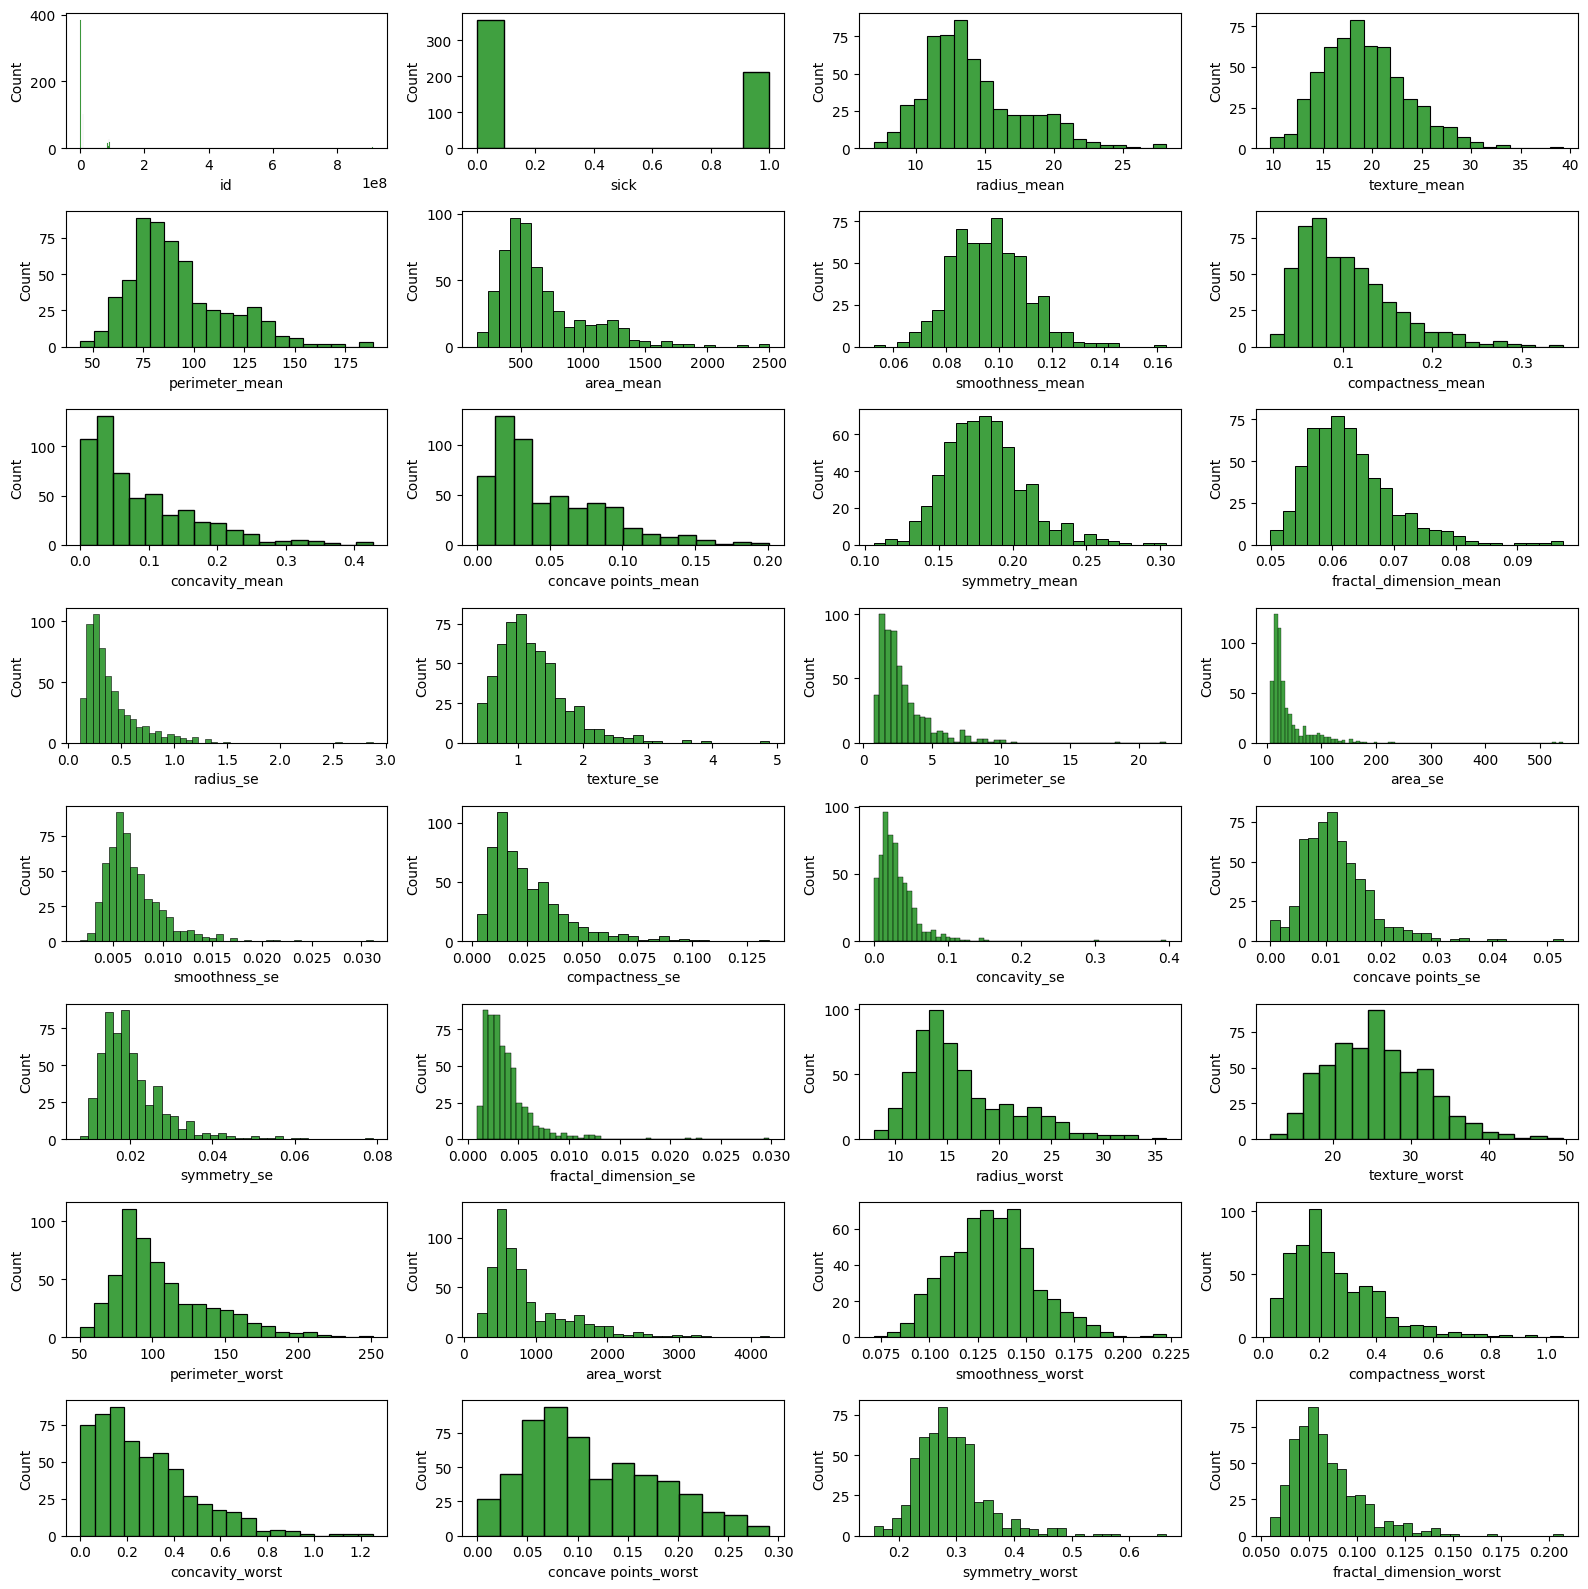

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(16,16))
for i, ax, column in zip(range(33), axes.flat, Breast_Cancer.iloc[:,:].columns):
    sns.histplot(Breast_Cancer.iloc[:,:],x=column,ax=ax,color='g')
plt.tight_layout()
plt.show()

On constate que la colonne id ne nous sert à priori à rien on envisage de s'en débarasser

### Graphiques pour le diabete

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

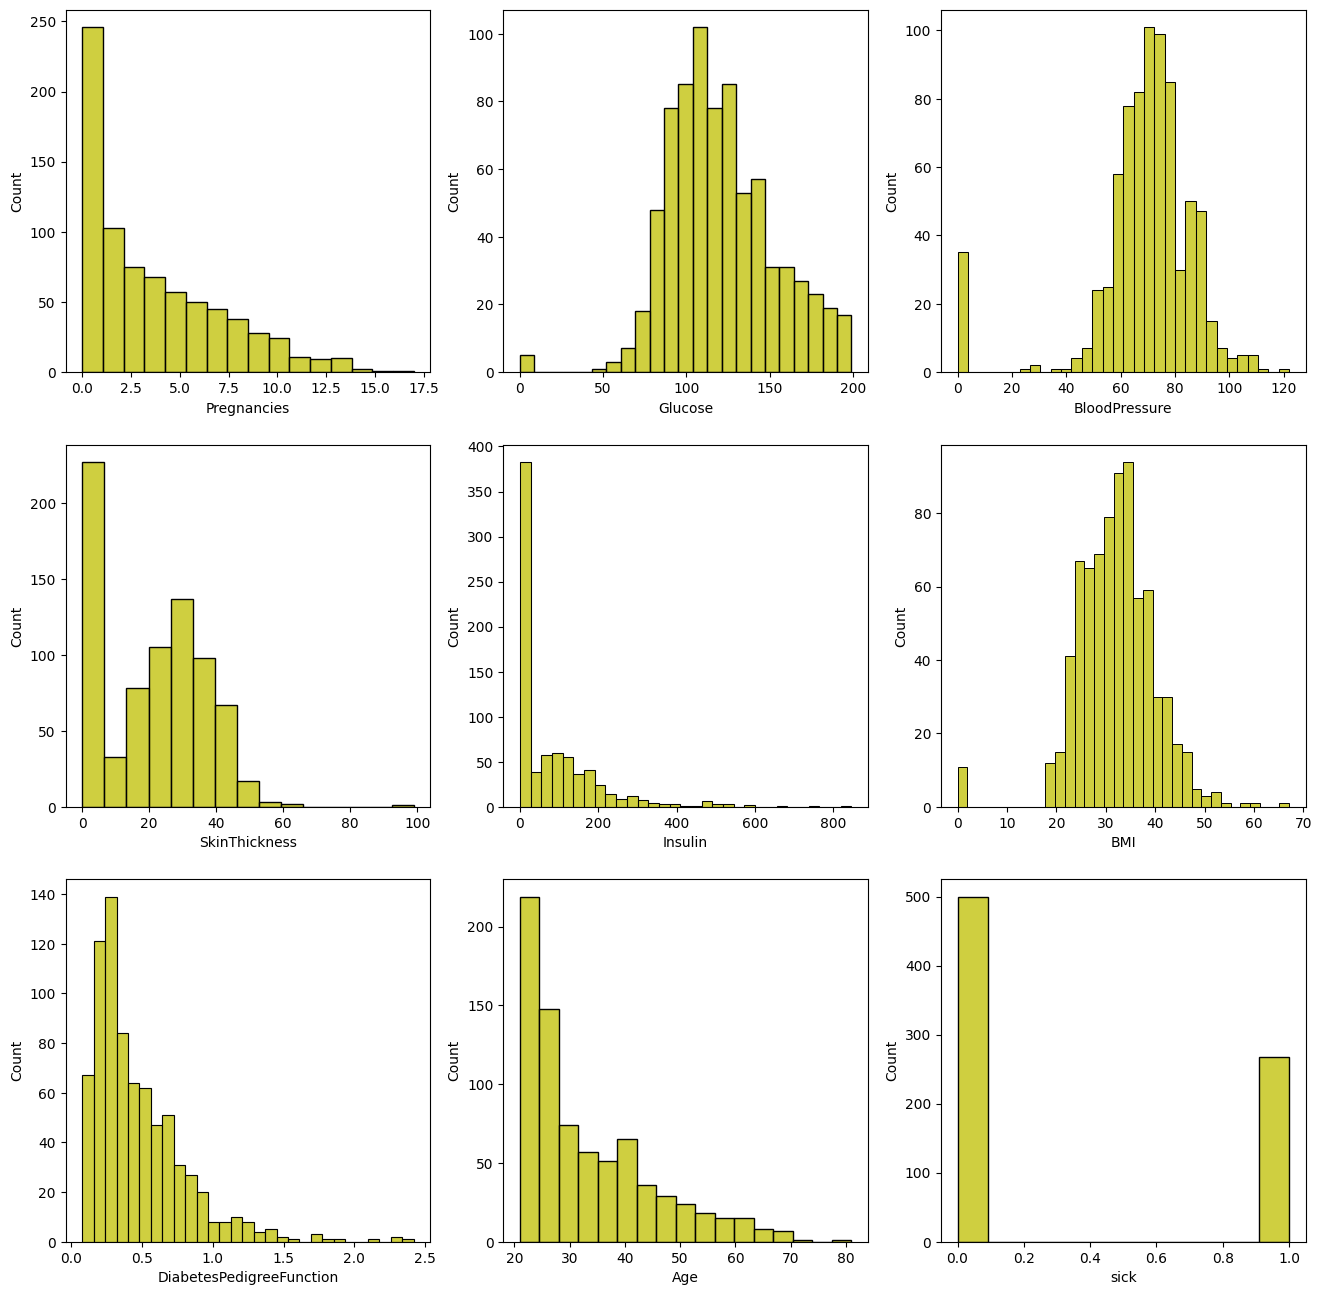

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax, column in zip(range(10), axes.flat, Diabetes.columns):
    sns.histplot(Diabetes,x=column,ax=ax,color='y')
plt.show()

Après investigation : les colonnes Glucose, Blood Pressure, Skin Thickness, Insulin, BMI comportent des valeurs 0 qui ne peuvent être que des valeurs non renseignées ou des erreurs car autrement elles signifiraient la mort de la personne testée. Nous allons les remplacer par des valeurs nan afin de ne pas biaiser ni les predictions ni les statistiques.


In [ ]:
Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

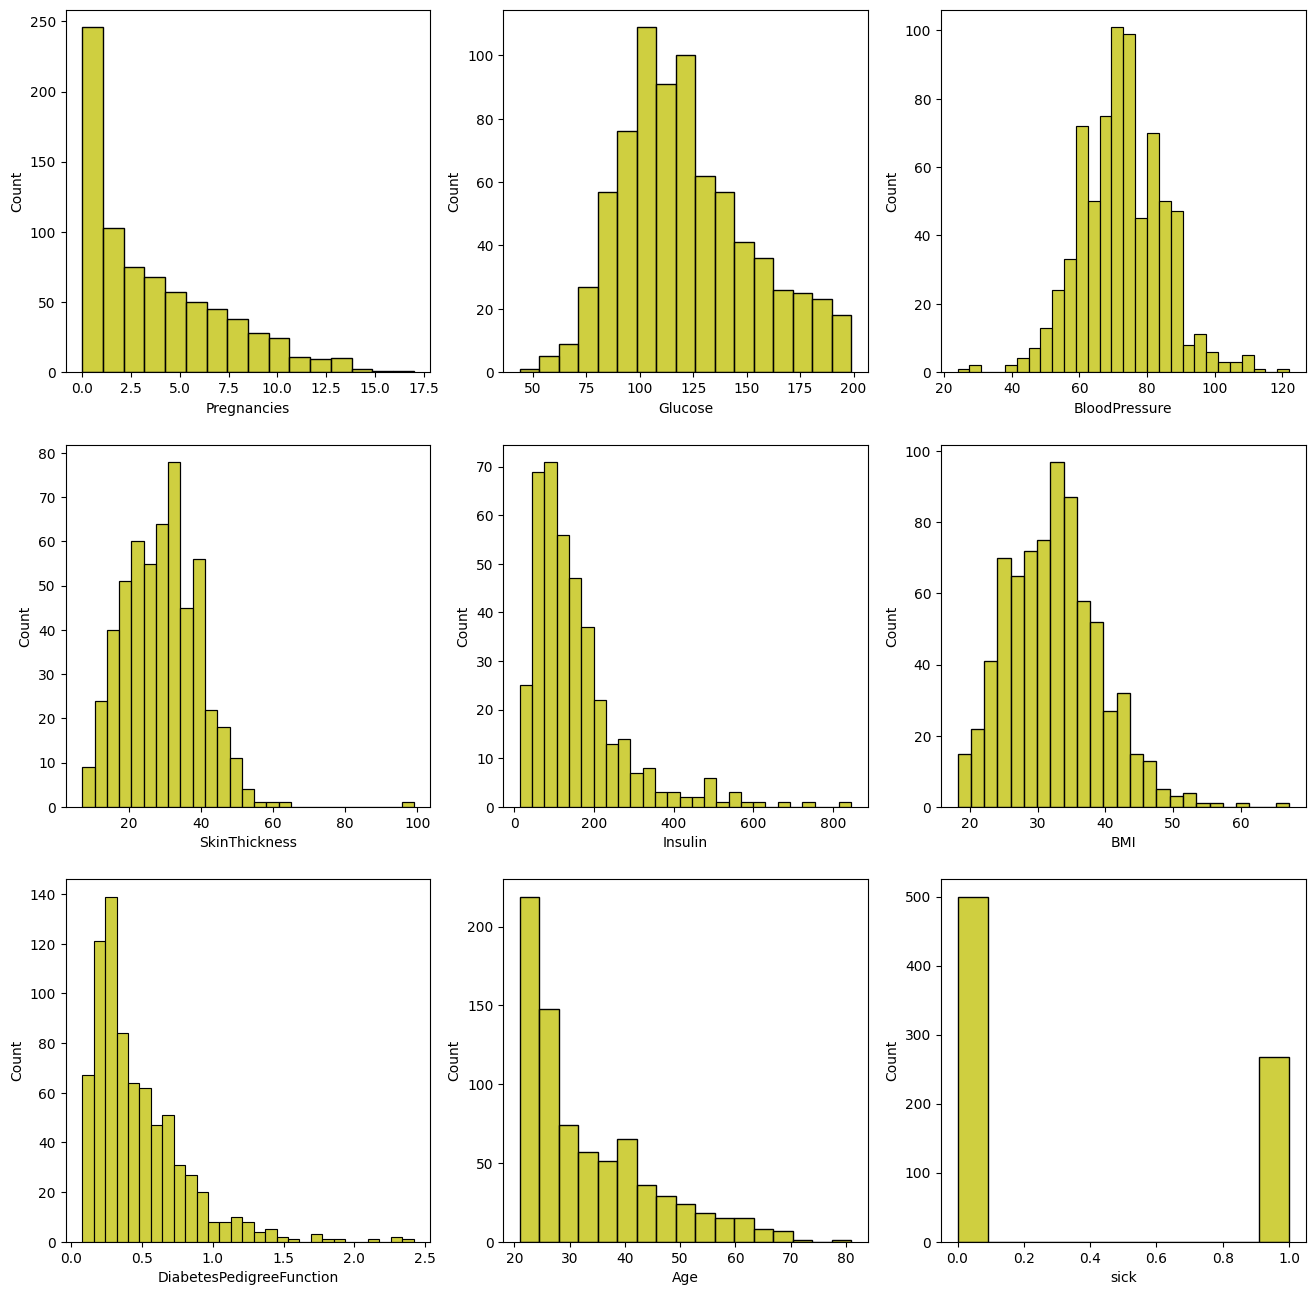

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax, column in zip(range(10), axes.flat, Diabetes.columns):
    sns.histplot(Diabetes,x=column,ax=ax,color='y')
plt.show()

### Graphique pour les maladies du coeur

In [ ]:
len(Heart_diseases.columns)

14

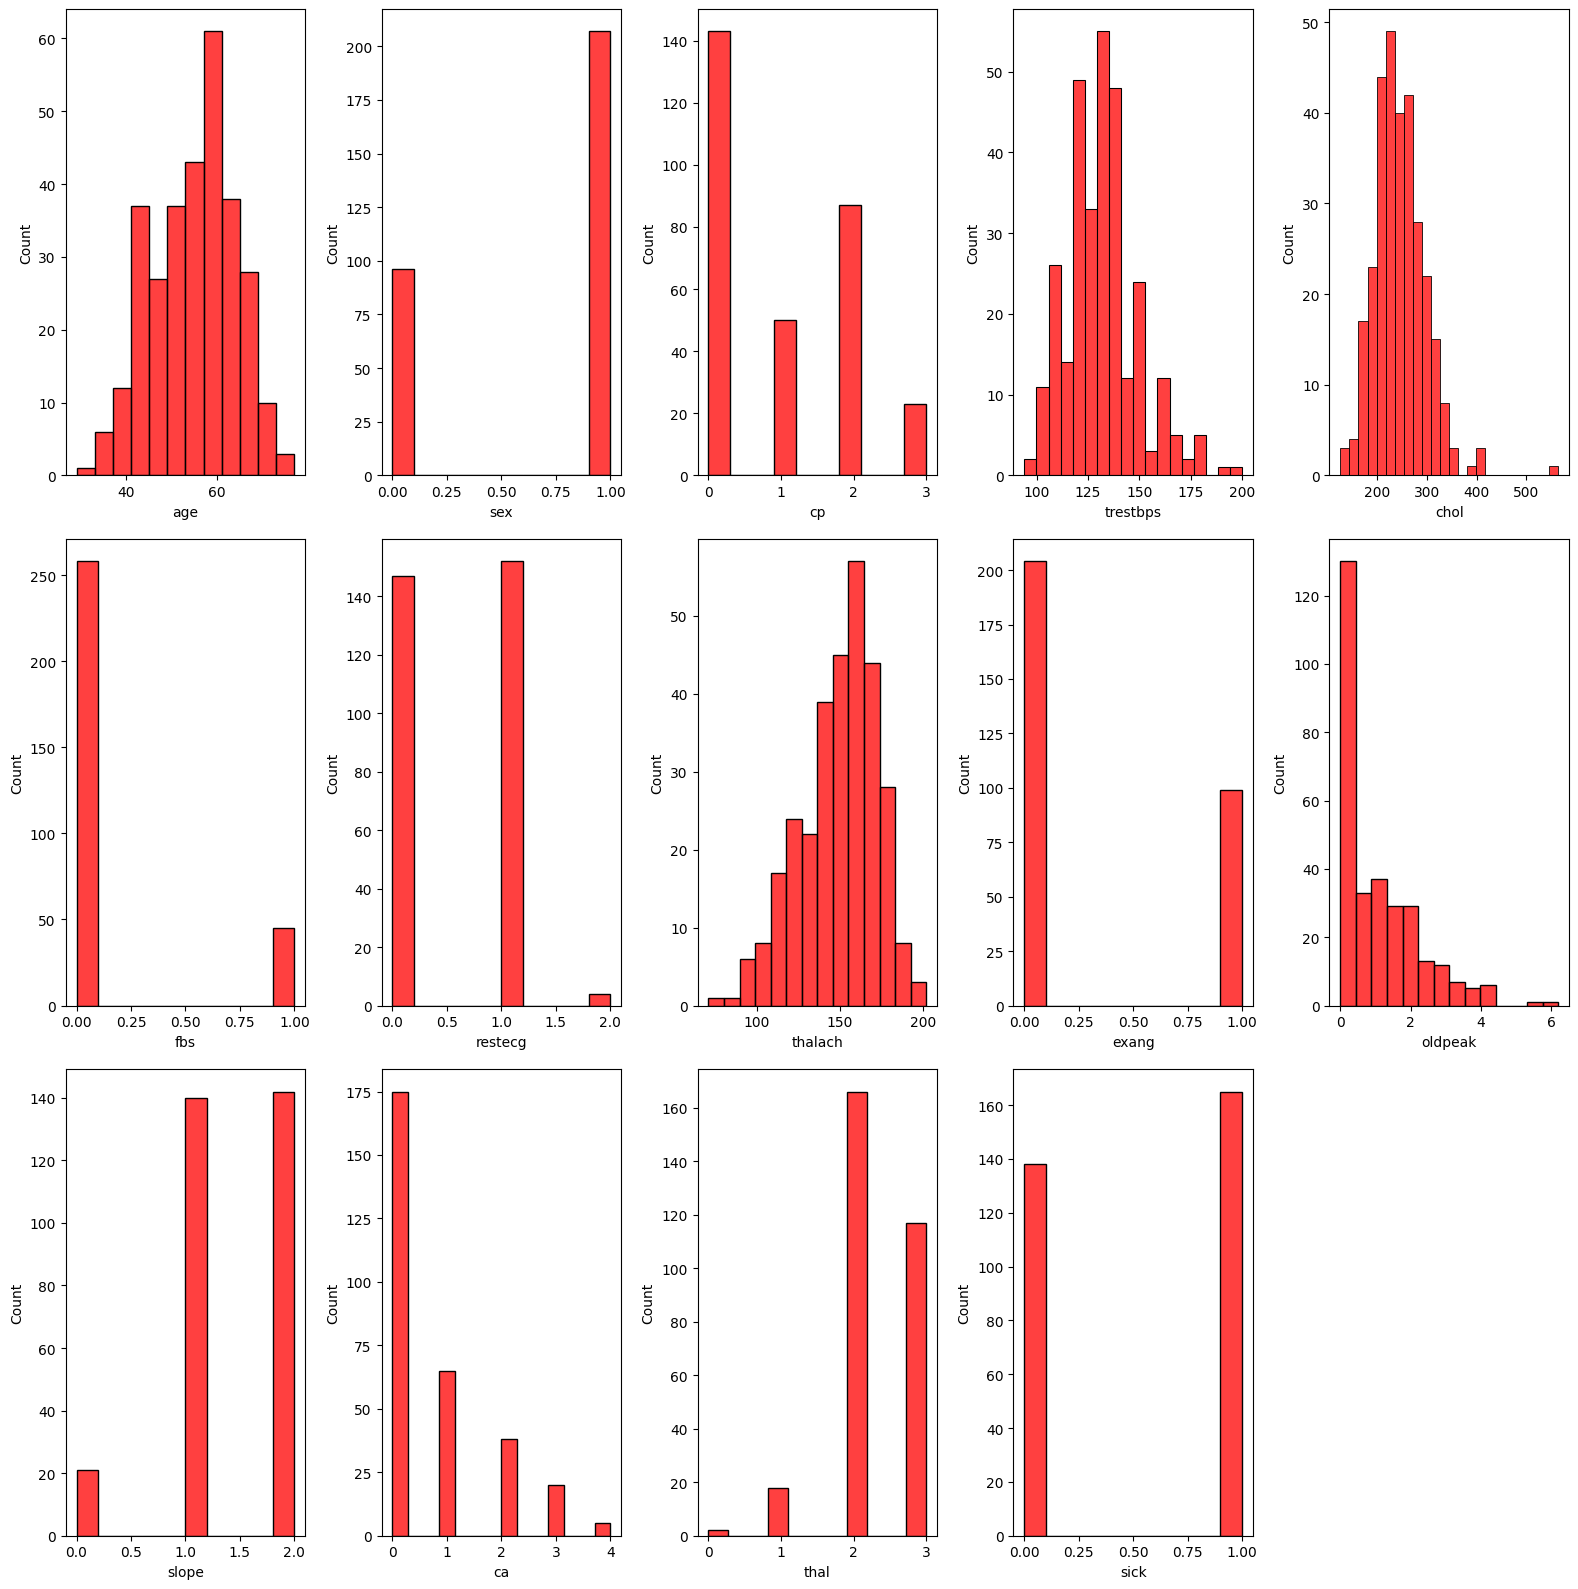

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(16,16))
for i, ax, column in zip(range(15), axes.flat, Heart_diseases.columns):
    sns.histplot(Heart_diseases,x=column,ax=ax,color='r')
plt.tight_layout()
axes.flat[-1].set_visible(False)
plt.show()

Après observation et étude des catégories des valeurs nous pouvons supposer qu'il n'y a pas de valeurs aberrantes ou à transformer

### Graphiques pour les maladies des reins

In [ ]:
len(Kidney_disease.columns)

26

In [ ]:
Kidney_disease = Kidney_disease.iloc[:,1:]

<ipython-input-38-b6adb7df275e>:4: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


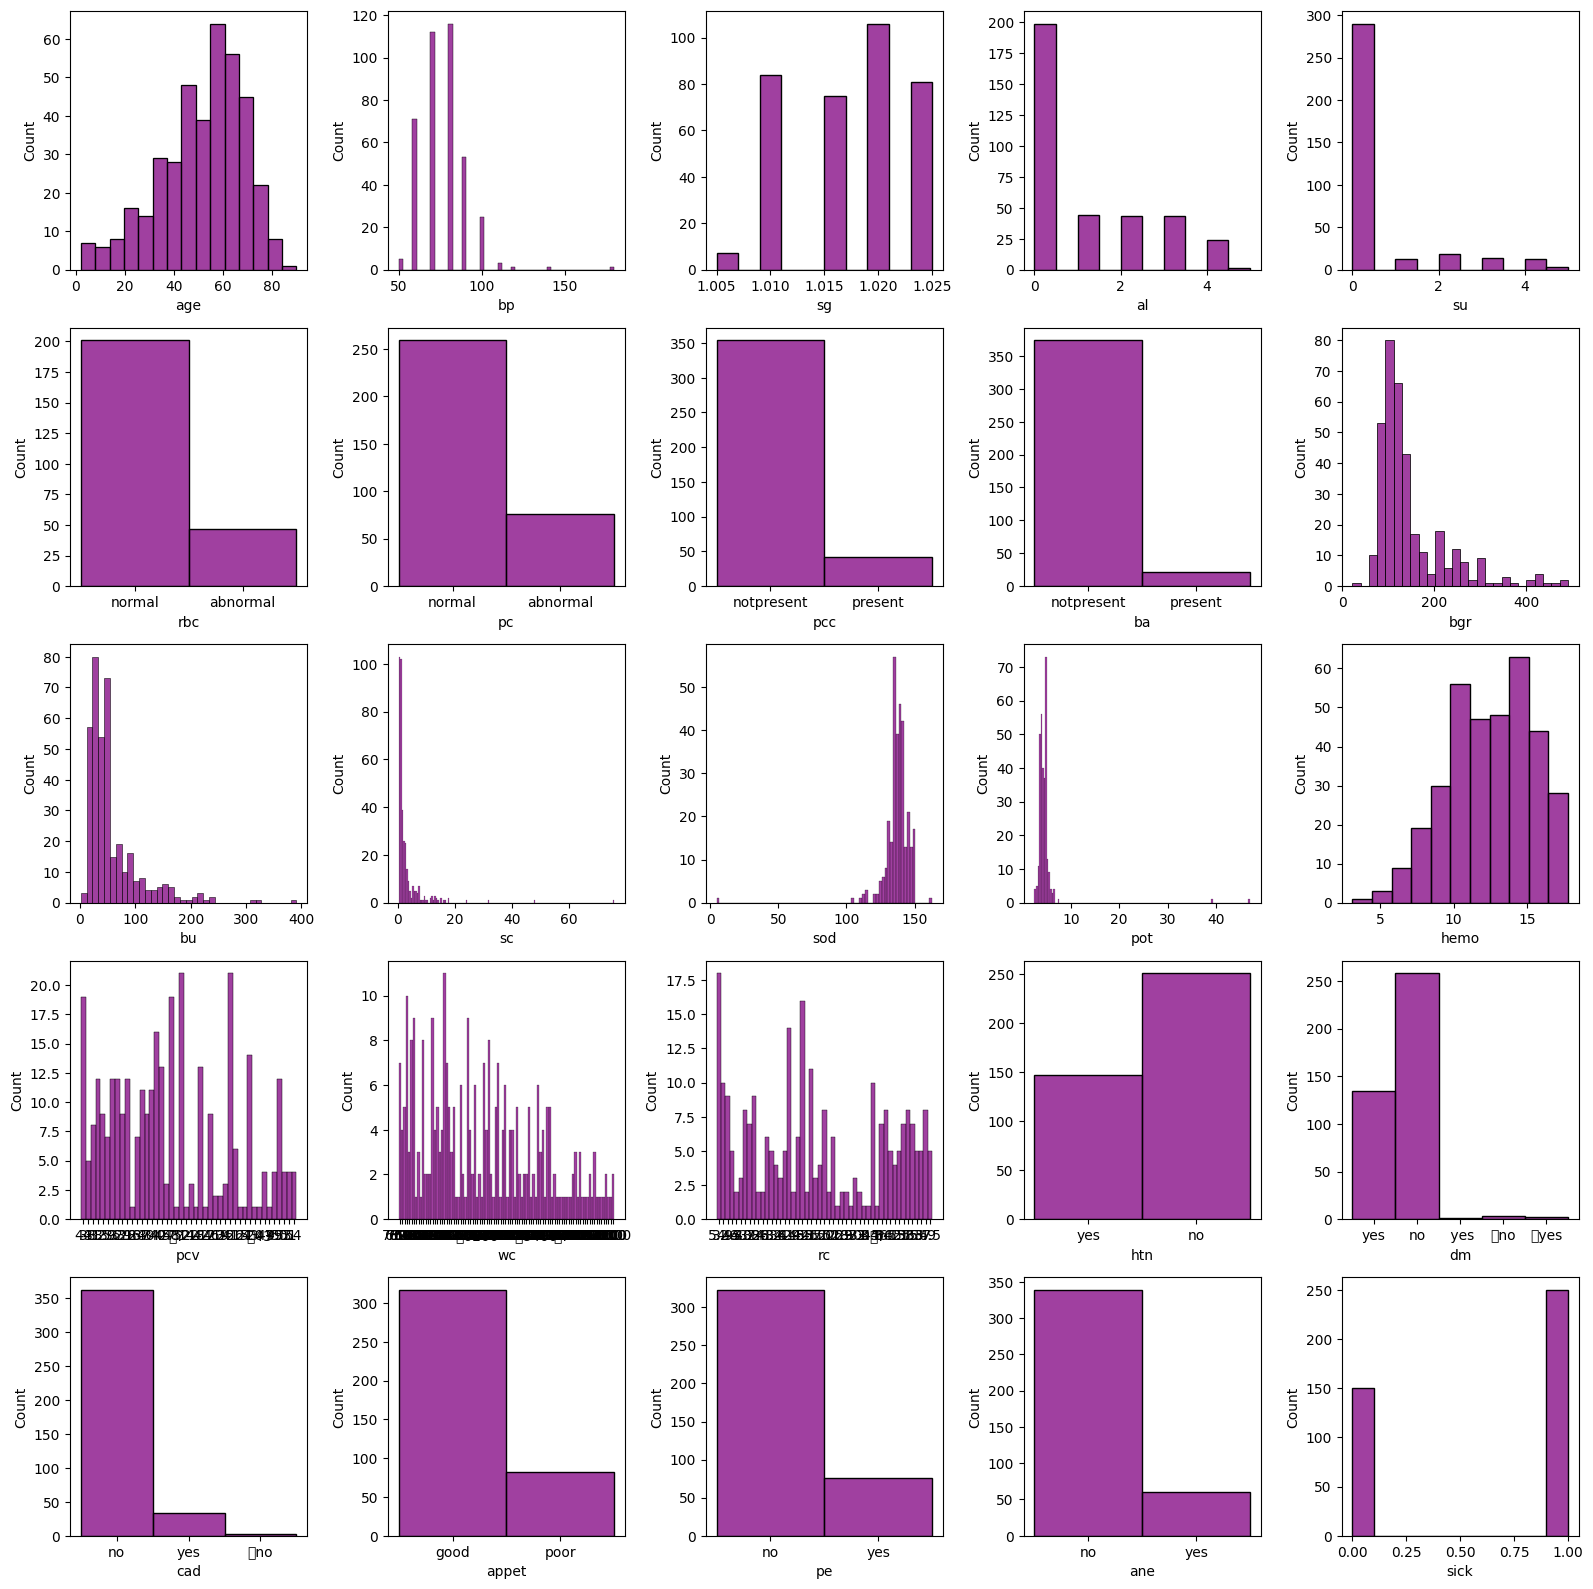

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(16,16))
for i, ax, column in zip(range(25), axes.flat, Kidney_disease.columns):
    sns.histplot(Kidney_disease,x=column,ax=ax,color='purple')
plt.tight_layout()
#axes.flat[-1].set_visible(False)
plt.show()

#### Nous décidons de remplacer les valeurs objet par des valeurs binaires afin d'uniformiser

In [ ]:
Kidney_disease['rbc'].apply(lambda x: 1 if x == 'abnormal' else 0)

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: rbc, Length: 400, dtype: int64

In [ ]:
Kidney_disease['pc'].apply(lambda x: 1 if x == 'abnormal' else 0)

0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pc, Length: 400, dtype: int64

In [ ]:
Kidney_disease['pcc'].apply(lambda x: 1 if x == 'present' else 0)

0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pcc, Length: 400, dtype: int64

In [ ]:
Kidney_disease['ba'].apply(lambda x: 1 if x == 'present' else 0)

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ba, Length: 400, dtype: int64

In [ ]:
Kidney_disease['pcv'].apply(lambda x: print(type(x)))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<c

0      None
1      None
2      None
3      None
4      None
       ... 
395    None
396    None
397    None
398    None
399    None
Name: pcv, Length: 400, dtype: object

Nous constatons que la colonne pcv contient deux types de valeurs, des strings et des floats, nous allons donc convertir tout en string pour pouvoir remplacer les valeurs aberrantes (tabulation, point d'interrogation) par des 0, nous convertissons la colonne en type numerique (int ou float) et nous remplacons les 0 par des nan

In [ ]:
Kidney_disease['pcv'] = Kidney_disease['pcv'].astype(str)

In [ ]:
Kidney_disease['pcv'] = Kidney_disease['pcv'].apply(lambda x: x.replace('\t','').replace('?','0'))

In [ ]:
Kidney_disease['pcv'] = Kidney_disease['pcv'].apply(lambda x: x.replace('nan','0'))

In [ ]:
Kidney_disease['pcv'] = Kidney_disease['pcv'].astype(int)

In [ ]:
Kidney_disease['pcv'].unique()

array([44, 38, 31, 32, 35, 39, 36, 33, 29, 28,  0, 16, 24, 37, 30, 34, 40,
       45, 27, 48, 52, 14, 22, 18, 42, 17, 46, 23, 19, 25, 41, 26, 15, 21,
       43, 20, 47,  9, 49, 50, 53, 51, 54])

In [ ]:
Kidney_disease['pcv'] = Kidney_disease['pcv'].apply(lambda x: np.nan if x == 0 else x)

Nous allons effectuer exactement le même traitement pour la colonne wc

In [ ]:
Kidney_disease['wc'] = Kidney_disease['wc'].astype(str)

In [ ]:
Kidney_disease['wc'] = Kidney_disease['wc'].apply(lambda x: x.replace('\t','').replace('?','0'))

In [ ]:
Kidney_disease['wc'] = Kidney_disease['wc'].apply(lambda x: x.replace('nan','0'))

In [ ]:
Kidney_disease['wc'] = Kidney_disease['wc'].astype(int)

In [ ]:
Kidney_disease['wc'] = Kidney_disease['wc'].apply(lambda x: np.nan if x == 0 else x)

Et aussi pour la colonne rc

In [ ]:
Kidney_disease['rc'] = Kidney_disease['rc'].astype(str)

In [ ]:
Kidney_disease['rc'].unique()

array(['5.2', 'nan', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [ ]:
Kidney_disease['rc'] = Kidney_disease['rc'].apply(lambda x: x.replace('\t?','0').replace('nan','0'))

In [ ]:
Kidney_disease['rc'] = Kidney_disease['rc'].astype(float)

In [ ]:
Kidney_disease['rc'] = Kidney_disease['rc'].apply(lambda x: np.nan if x == 0 else x)

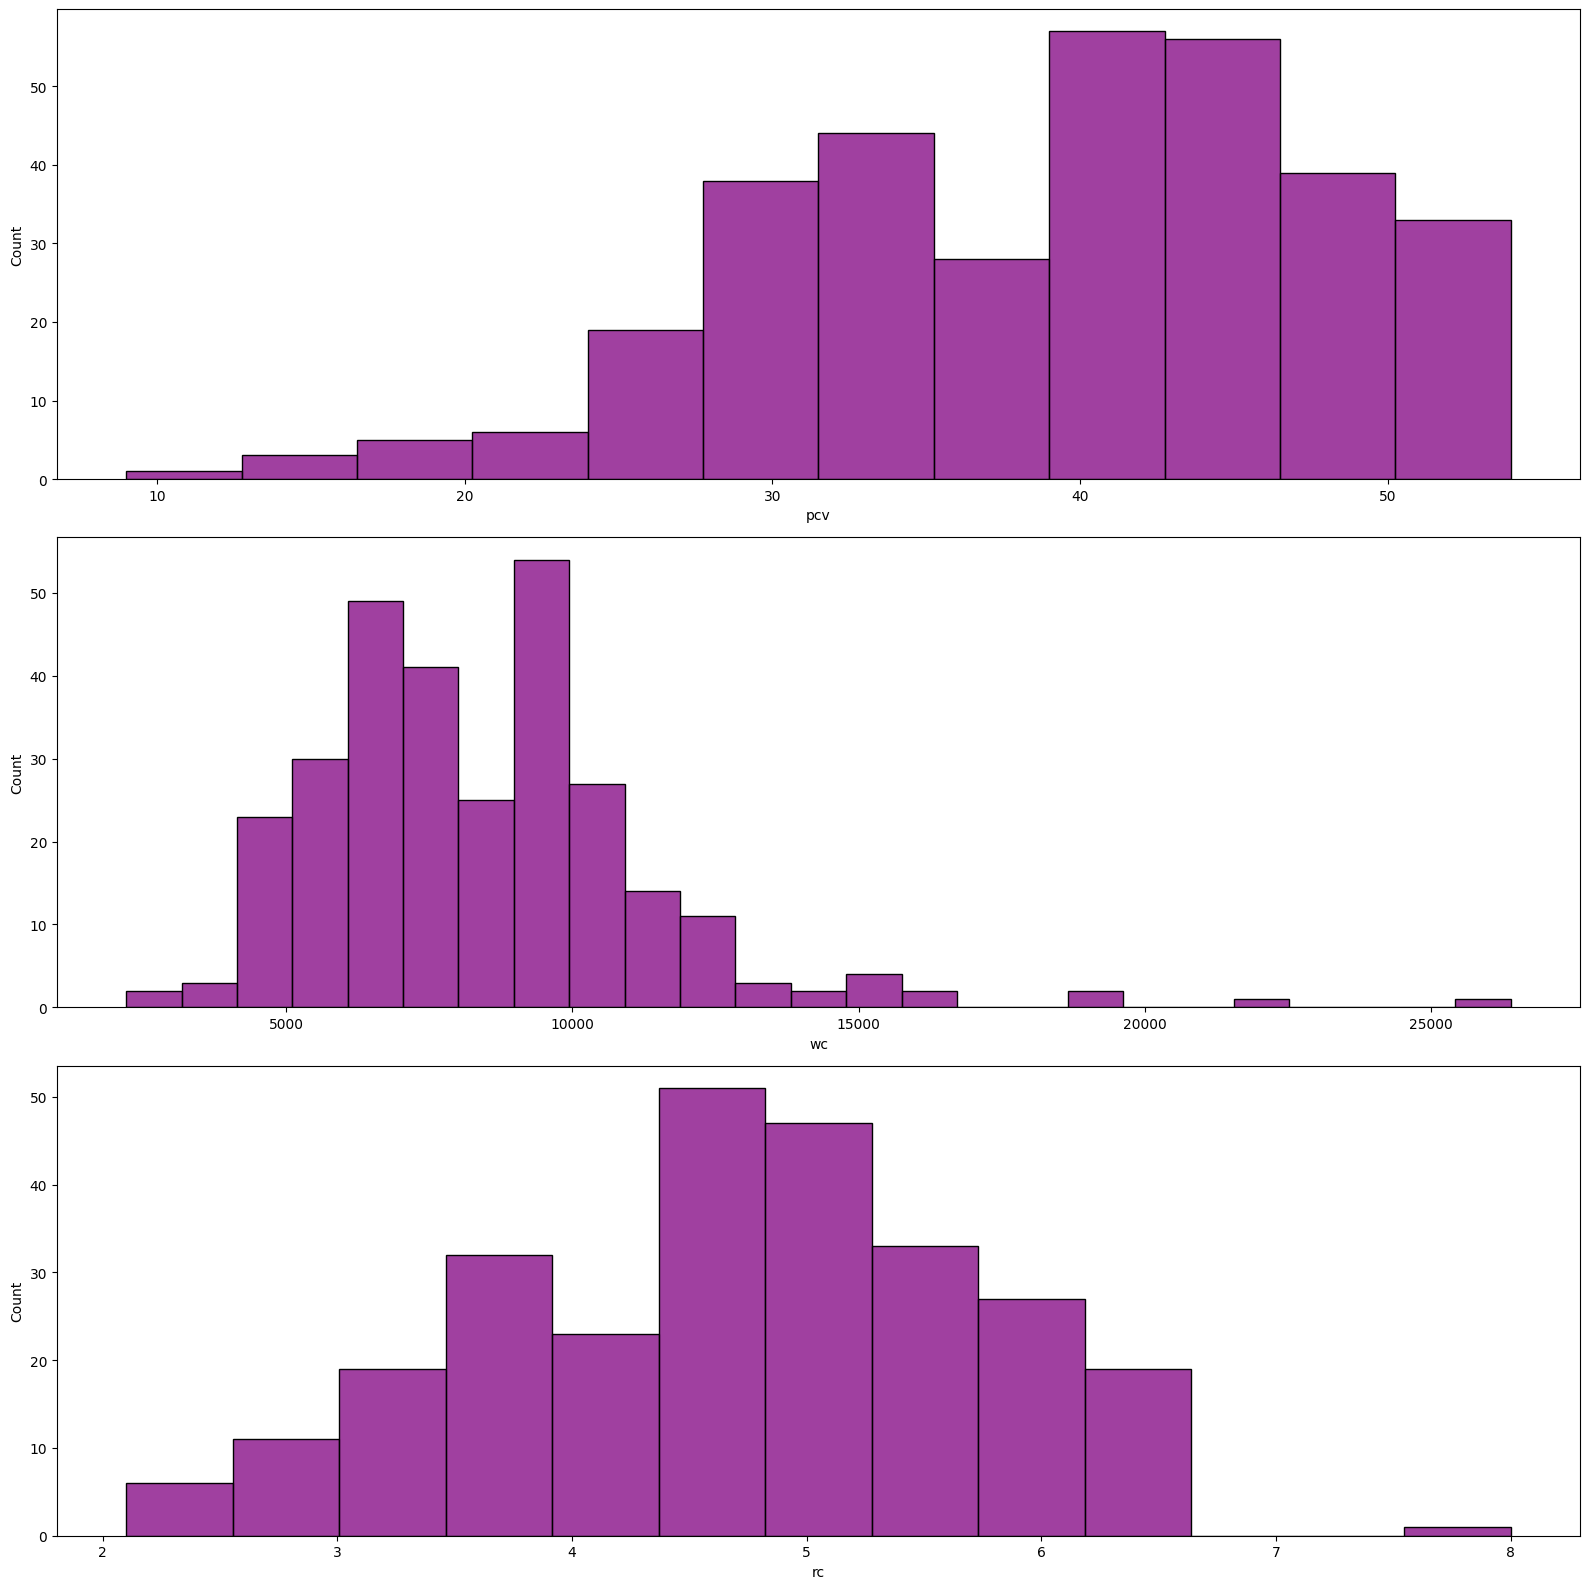

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16,16))
for i, ax, column in zip(range(3), axes.flat, Kidney_disease.iloc[:,15:18].columns):
    sns.histplot(Kidney_disease,x=column,ax=ax,color='purple')
plt.tight_layout()
#axes.flat[-1].set_visible(False)
plt.show()

Nous uniformisons les valeurs à 1 si présence d'hypertension (yes) et 0 pour le reste, en conservant les nan

In [ ]:
Kidney_disease['htn'] = Kidney_disease['htn'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

Les valeurs de dm ne sont pas uniformes car il y a des fautes de saisie

In [ ]:
Kidney_disease = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv')

RBC normal/abnormal, PC normal/abnormal, PCC notpresent/present, BA notpresent/present, HTN yes/no, DM yes/no, CAD yes/no, APPET good/poor, PE yes/no, ANE yes/no

In [ ]:
Kidney_disease['cad'].unique()

array([ 0.,  1., nan])

In [ ]:
Kidney_disease['dm'] = Kidney_disease['dm'].astype(str)

In [ ]:
Kidney_disease['dm'] = Kidney_disease['dm'].apply(lambda x: x.replace('\t','').replace('nan','99').replace(' ',''))

In [ ]:
Kidney_disease['dm'] = Kidney_disease['dm'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [ ]:
Kidney_disease['dm'] = Kidney_disease['dm'].astype(float)

In [ ]:
Kidney_disease['dm'] = Kidney_disease['dm'].apply(lambda x: np.nan if x == 99 else x)

In [ ]:
Kidney_disease['dm'].unique()

array([ 1.,  0., nan])

#### Rédaction d'une fonction pour tout faire au lieu de répéter ligne par ligne

In [ ]:
def cleanmap(x):
    bad_var = ['yes','abnormal','present','poor']
    if type(x) == float:
            x = x
    else:
        x = str(x).replace('\t','').replace(' ','')
        if x in bad_var:
            x = 1
        else:
            x = 0
    return(x)

In [ ]:
binary_columns = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

In [ ]:
for column in binary_columns:
    Kidney_disease[column] = Kidney_disease[column].apply(cleanmap)

### Graphiques pour les maladies du foie

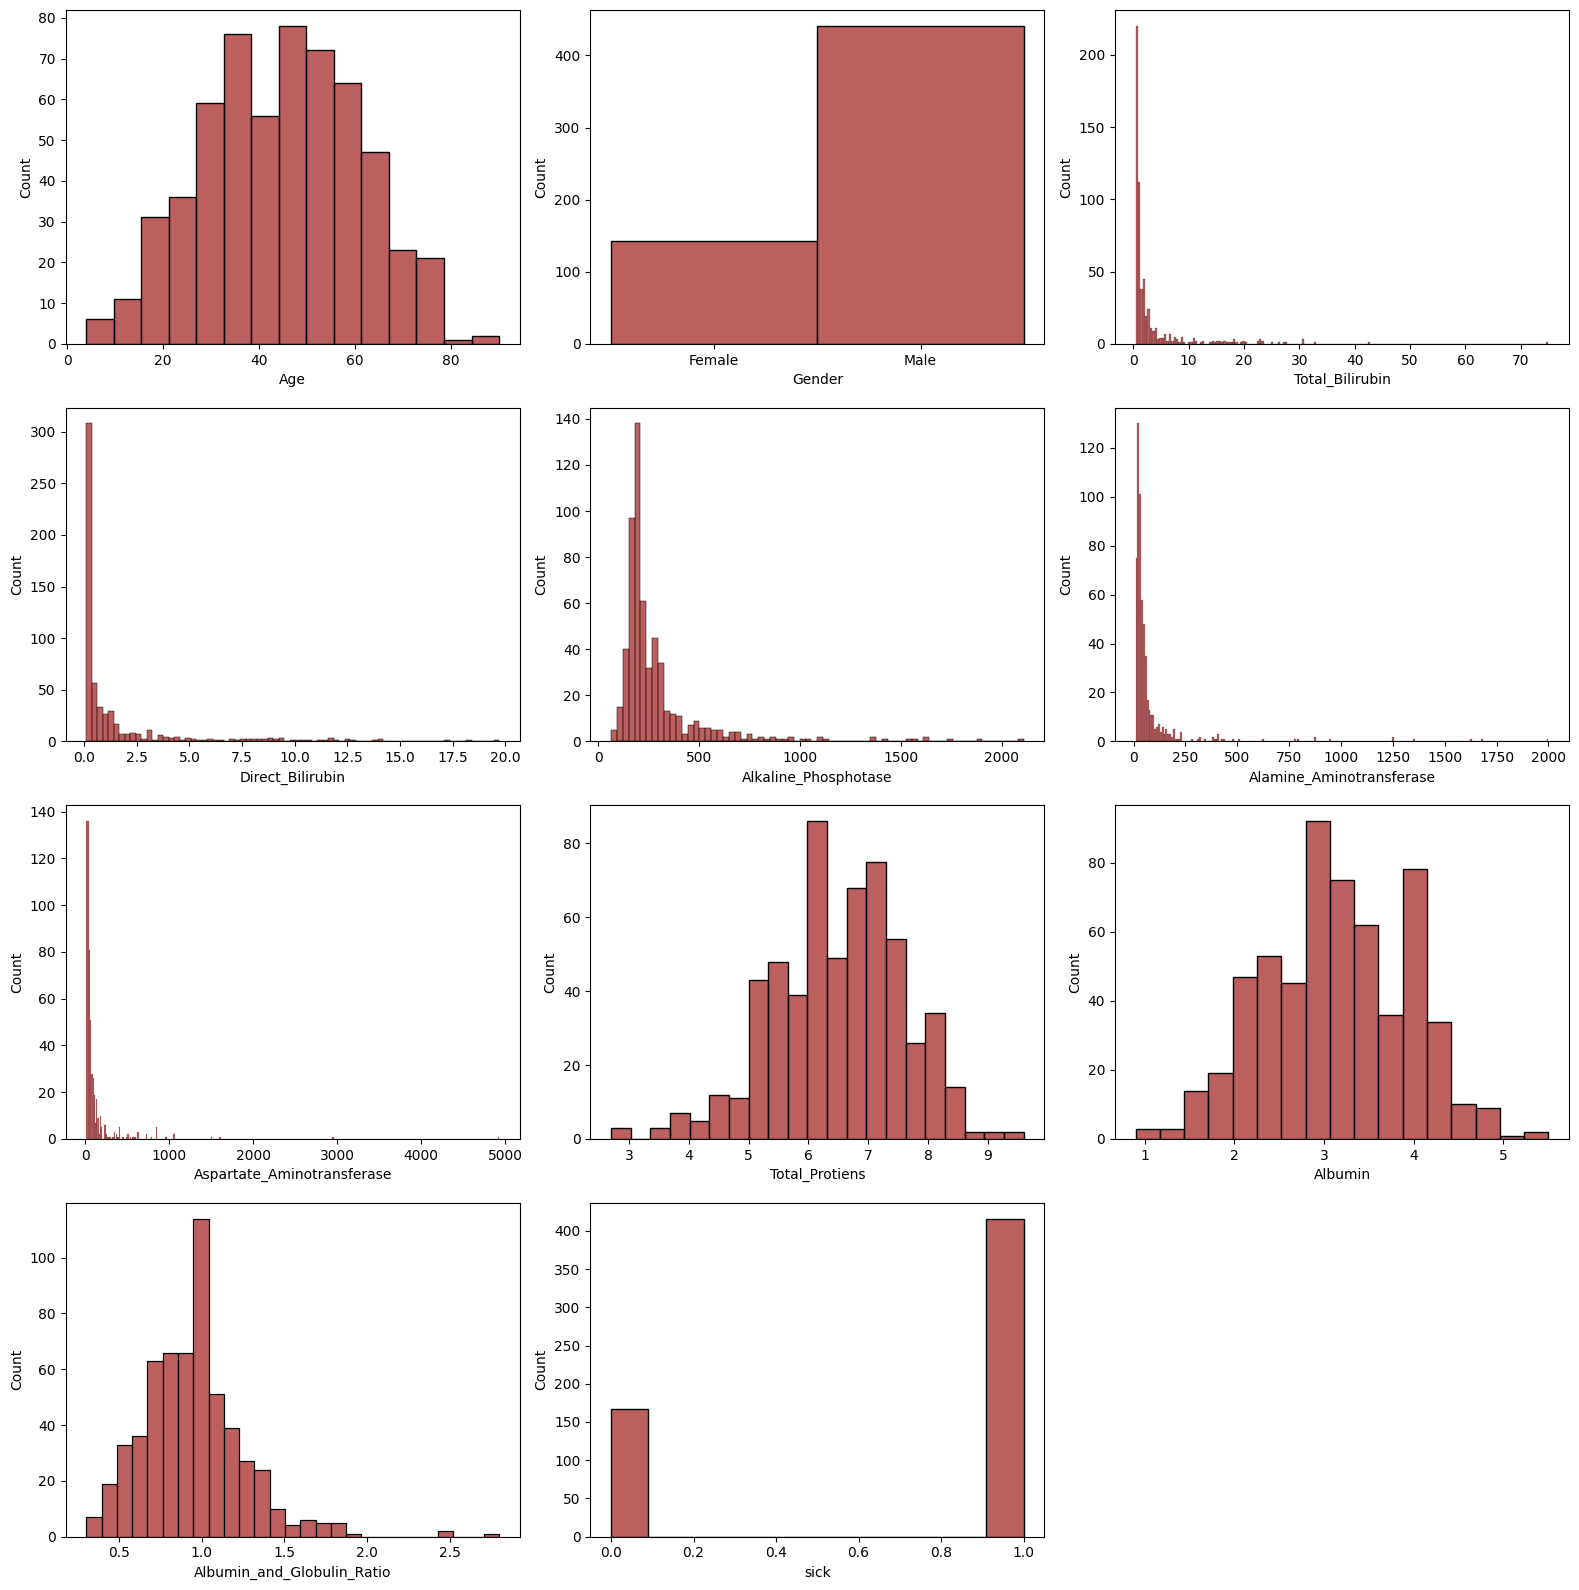

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16,16))
for i, ax, column in zip(range(12), axes.flat, Liver_disease.columns):
    sns.histplot(Liver_disease,x=column,ax=ax,color='brown')
plt.tight_layout()
axes.flat[-1].set_visible(False)
plt.show()

In [ ]:
Liver_disease['Gender'] = Liver_disease.Gender.map({'Male':1,'Female':0})